# Help NGO  ASSIGNMENT

##  PROBLEM STATEMENT

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

During the recent funding programs,NGO have been able to raise around $10 million. As an analyst, we have to come up with 
the countries list that are in the direst need of aid.



## OBJECTIVE


Our role is to analyse the given data among 167 countries and we need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.


## DATA DICTIONARY

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

## Steps for clustering

1. Understanding the problem statement

2. collecting the data

3. reading the data

4. EDA

5. Preprocessing

    -Outlier Treatment
    
    -Scaling
    
    
6. Cluster Tendency Check: We need check if the data for clustering is actually having some visible clusters or not?

    -Hopkins Test
    
    
7. Find the value of K

    -Business
    
    -Silhouette
    
    -SSD
    
    
8. Final KMean Analysis

    -Kmeans with final value of K
    
    
9. Cluster Profiling

    -We try to make sense out of various clusters
    

10. Hierarchical clustering

    -single linkage 
    
    -complete linkage
    

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## Read and understand the data

In [88]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [89]:
# reporting the number of rows and columns.
df.shape

(167, 10)

The given dataset has 167 rowns and 10 columns.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Cleaning the Data 

In the given data above column exports, health and imports are given in % so, we need to convert them back to normal values

In [91]:
df['exports']= (df['exports']*df['gdpp'])/100
df['health']= (df['health']*df['gdpp'])/100
df['imports']= (df['imports']*df['gdpp'])/100

In [92]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Here, exports, heath and imports variables are in percenatge of the total GDP format. So, It is converted into actual value on the basis of GDPP since, GDP data and population data is not present in data set.


## EDA

In [93]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no missing values in the data.

## Data Visualization


### Univariate Analysis
We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

### We will have a look on the lowest 10 countries for each factor.


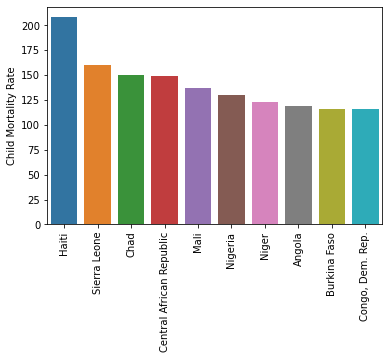

In [94]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation='vertical')
plt.show()

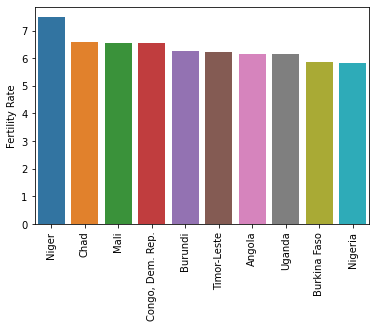

In [95]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same

top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer)
plt1.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation='vertical')
plt.show()

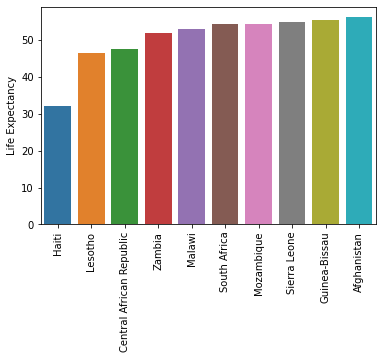

In [96]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
plt1.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation="vertical")
plt.show()

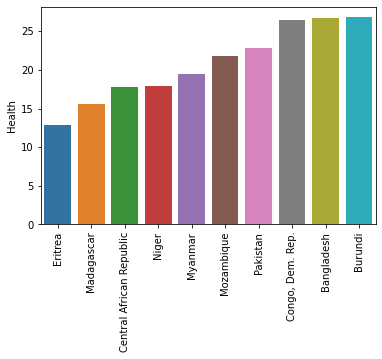

In [97]:
# Health :Total health spending as %age of Total GDP.

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health)
plt1.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation="vertical")
plt.show()

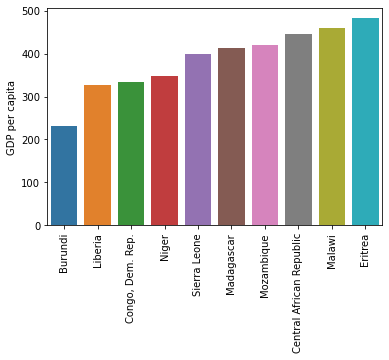

In [98]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp)
plt1.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation="vertical")
plt.show()

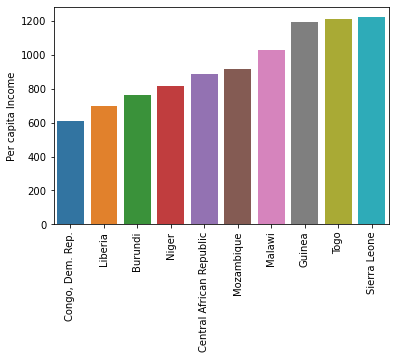

In [99]:
# Per capita Income : Net income per person

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income)
plt1.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation="vertical")
plt.show()

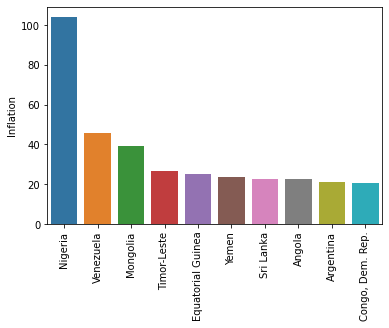

In [100]:
# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation)
plt1.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation="vertical")
plt.show()

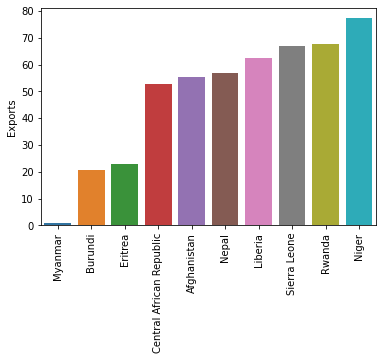

In [101]:
# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports)
plt1.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation="vertical")
plt.show()

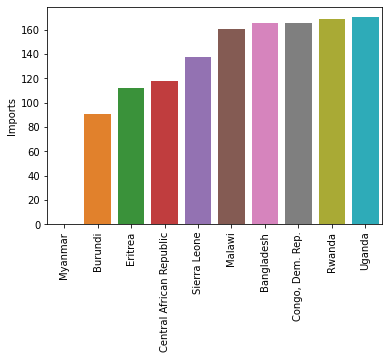

In [102]:
# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports)
plt1.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation="vertical")
plt.show()

### Performing mulitivariate analysis and getting some insights of the correlation of the data.

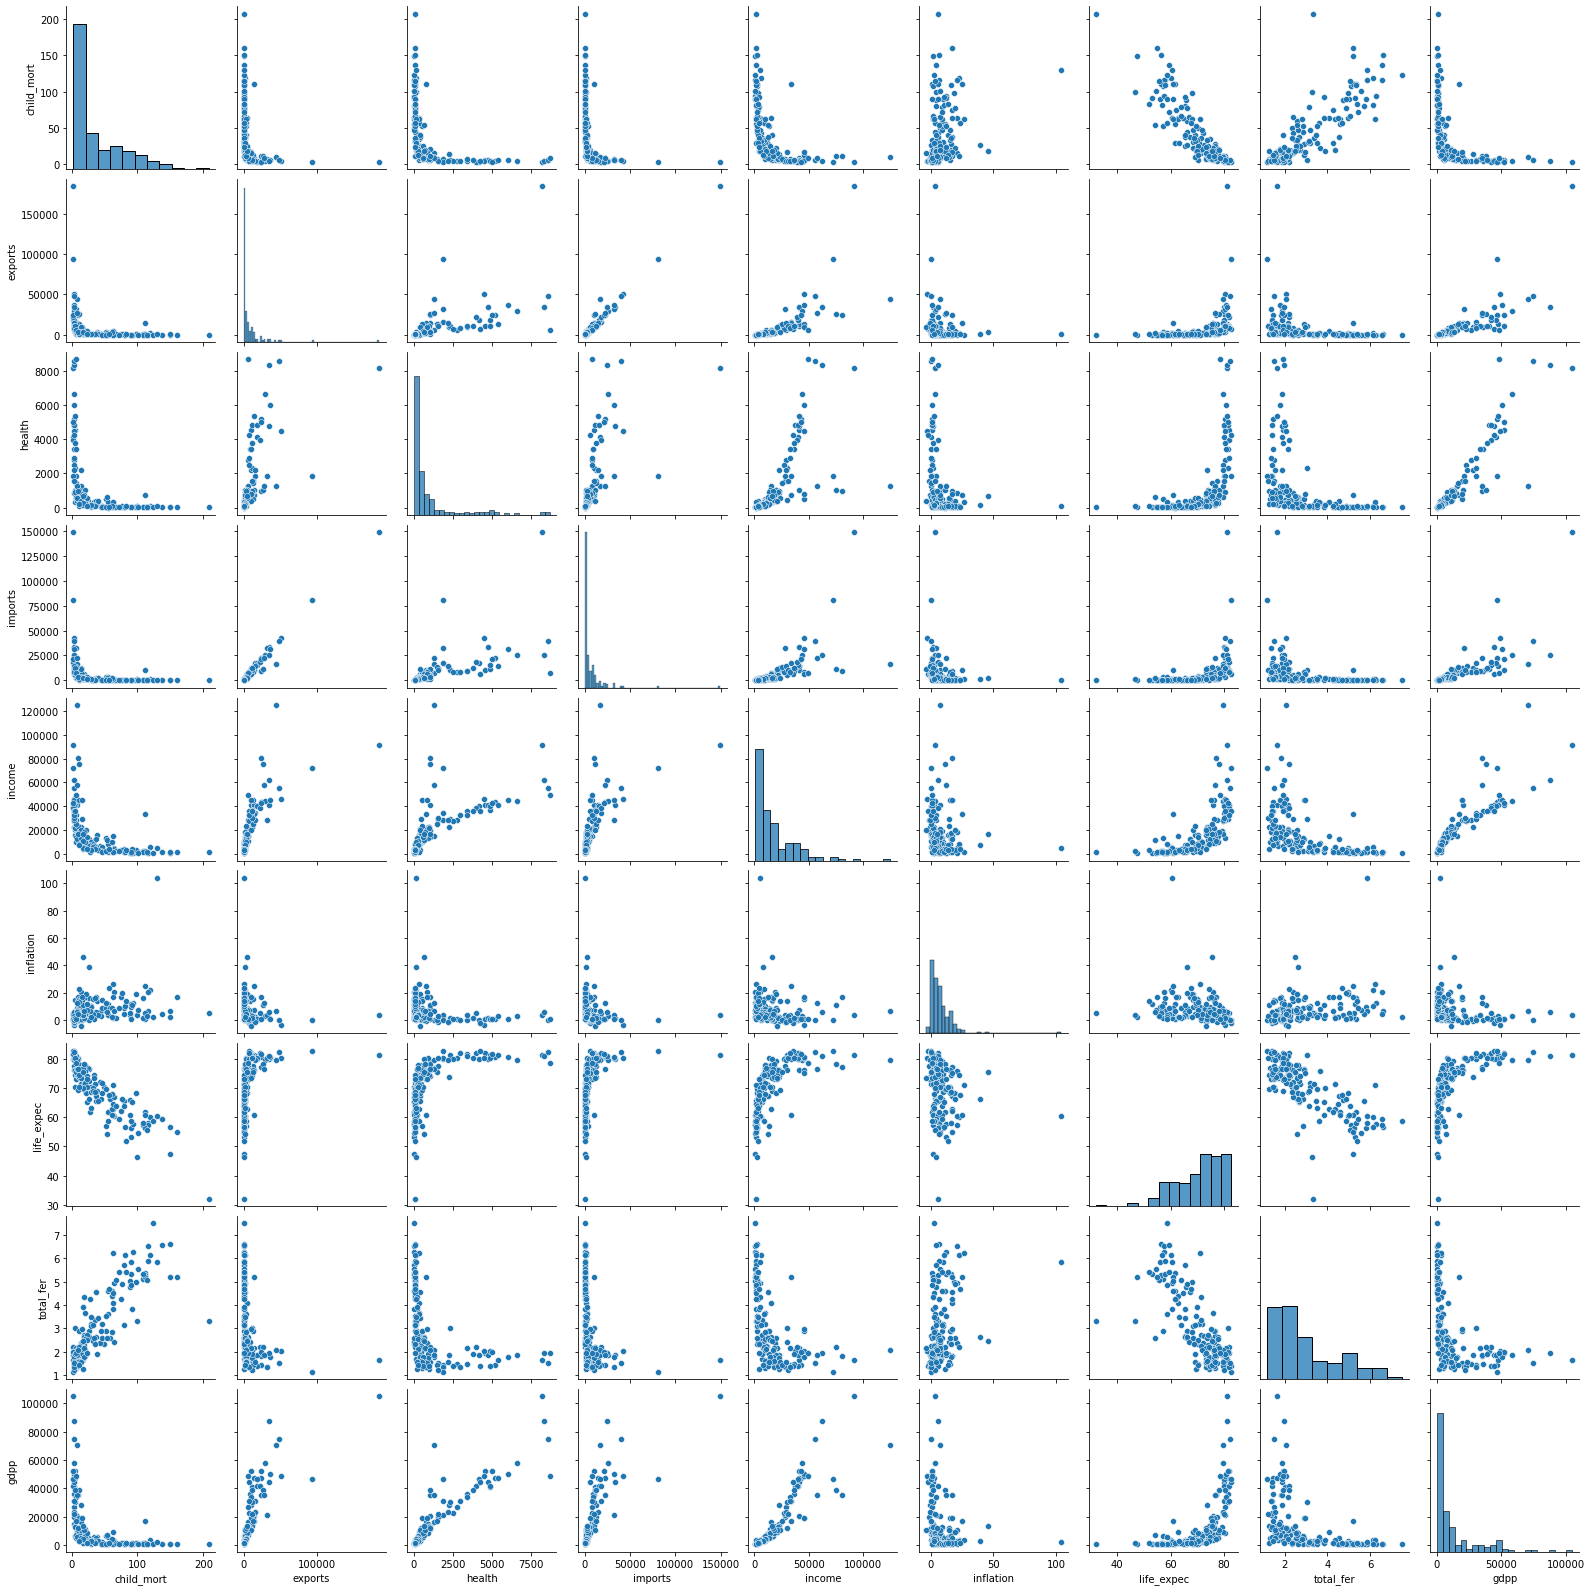

In [103]:
sns.pairplot(df)
plt.show()

In [104]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


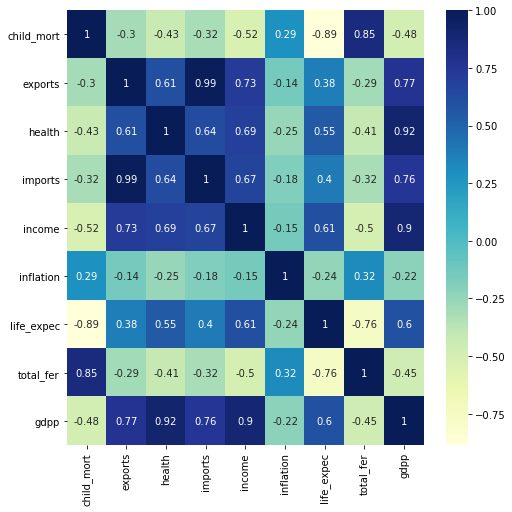

In [105]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")
plt.show()

Inference:

-  child_mortality and life_expentency are highly correlated with correlation of -0.89
-  child_mortality and total_fertility are highly correlated with correlation of 0.85
-  imports and exports are highly correlated with correlation of 0.74
-  life_expentency and total_fertility are highly correlated with correlation of -0.76

##### Here we can see a very high correlation between the columns but we can work which these correlations as clustering is not affected much by the correlations betweeen variables.

### Checking outliers

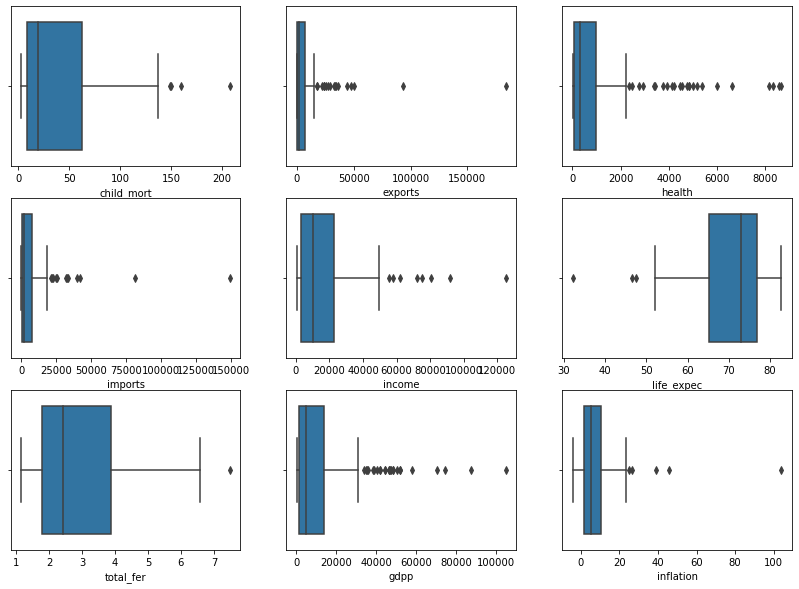

In [106]:
#checking the outliers

plt.figure(figsize=[14,10])

plt.subplot(3,3,1)
sns.boxplot(x=df['child_mort'],data=df)

plt.subplot(3,3,2)
sns.boxplot(x=df['exports'],data=df)

plt.subplot(3,3,3)
sns.boxplot(x=df['health'],data=df)

plt.subplot(3,3,4)
sns.boxplot(x=df['imports'],data=df)

plt.subplot(3,3,5)
sns.boxplot(x=df['income'],data=df)

plt.subplot(3,3,6)
sns.boxplot(x=df['life_expec'],data=df)

plt.subplot(3,3,7)
sns.boxplot(x=df['total_fer'],data=df)

plt.subplot(3,3,8)
sns.boxplot(x=df['gdpp'],data=df)

plt.subplot(3,3,9)
sns.boxplot(x=df['inflation'],data=df)


plt.show()

So, as we can see there are ouliers in our numeric columns


## Treating outliers

In [107]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [108]:
df = outlier_treatment(df, 'child_mort')
df = outlier_treatment(df, 'exports')
df = outlier_treatment(df, 'health')
df = outlier_treatment(df, 'imports')
df = outlier_treatment(df, 'income')
df = outlier_treatment(df, 'inflation')
df = outlier_treatment(df, 'life_expec')
df = outlier_treatment(df, 'total_fer')
df = outlier_treatment(df, 'gdpp')

In [109]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


<ipython-input-110-05fd9976eaef>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,8)


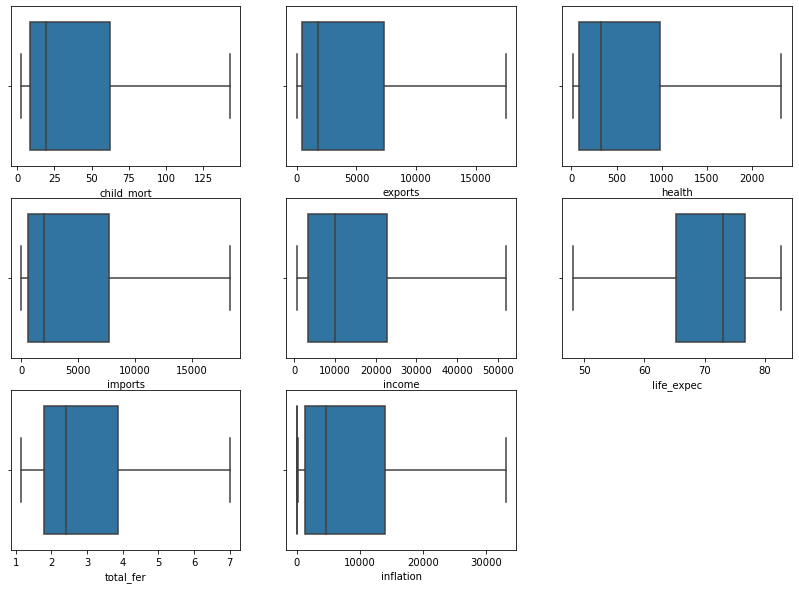

In [110]:
plt.figure(figsize=[14,10])

plt.subplot(3,3,1)
sns.boxplot(x=df['child_mort'],data=df)

plt.subplot(3,3,2)
sns.boxplot(x=df['exports'],data=df)

plt.subplot(3,3,3)
sns.boxplot(x=df['health'],data=df)

plt.subplot(3,3,4)
sns.boxplot(x=df['imports'],data=df)

plt.subplot(3,3,5)
sns.boxplot(x=df['income'],data=df)

plt.subplot(3,3,6)
sns.boxplot(x=df['life_expec'],data=df)

plt.subplot(3,3,7)
sns.boxplot(x=df['total_fer'],data=df)

plt.subplot(3,3,8)
sns.boxplot(x=df['gdpp'],data=df)

plt.subplot(3,3,8)
sns.boxplot(x=df['inflation'],data=df)

plt.show()

## Preprocessing

#### Hokins test

In [111]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [112]:
hopkins(df.drop('country',axis=1))

0.8999276164439487

The data looks good for the clustering.

## Scaling the data for clustering 

In [113]:
# Here we are using standard scalar.
df1=df.drop('country',axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [114]:
df1.shape

(167, 9)

In [115]:
scaler=StandardScaler()
df1=scaler.fit_transform(df1)

# KMeans clustering

## Finding the optimal number of clusters


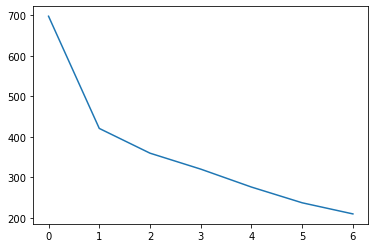

In [116]:
# Finding Optimal number of clusters.
# Elbow Curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df1)
    ssd.append( kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

Here we can see the elbow curve on the values 2, 3 and 4.

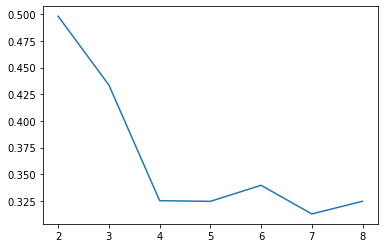

In [117]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df1)
    ssd.append([num_clusters, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

since we are getting very strange results we will be using silhoutte score to determine the optimal number of k.



### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

 ### Using silhoutte score to determine the optimal number of k.

In [118]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.49089694803242895
For n_clusters=3, the silhouette score is 0.43360177139259876
For n_clusters=4, the silhouette score is 0.32436810285701795
For n_clusters=5, the silhouette score is 0.32611022128924727
For n_clusters=6, the silhouette score is 0.3359252438489888
For n_clusters=7, the silhouette score is 0.3192637142348988
For n_clusters=8, the silhouette score is 0.33285013247325823


Optimal number of k is 3. #according to the silhoutte score and elbow curve.

### Optimal Number of K=3


### Initialising kmeans

In [119]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(df1)


KMeans(max_iter=100, n_clusters=3, random_state=100)

In [120]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [121]:
# assign the label to data frame
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [122]:
df['cluster_id'].value_counts()

2    78
0    48
1    41
Name: cluster_id, dtype: int64

## Visualizing the clusters.

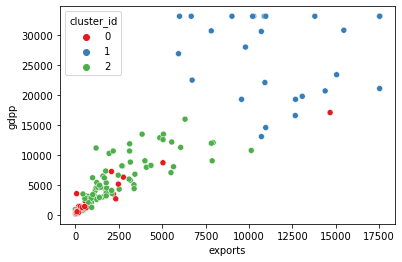

In [123]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

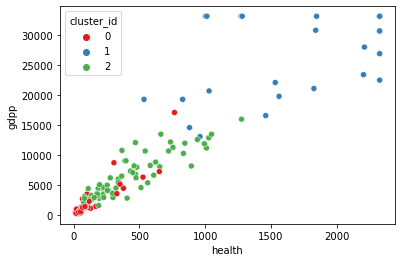

In [124]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

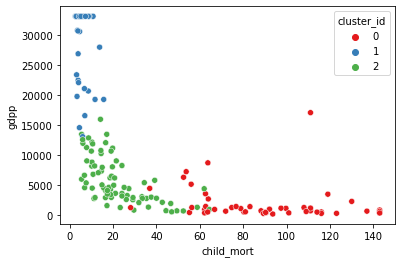

In [125]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

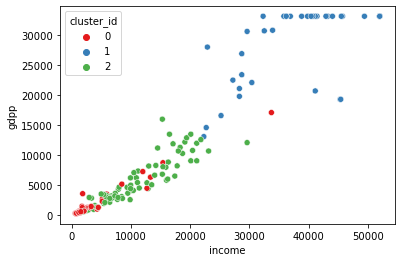

In [126]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

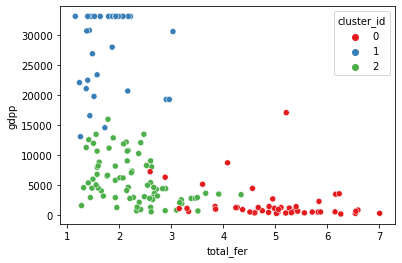

In [127]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

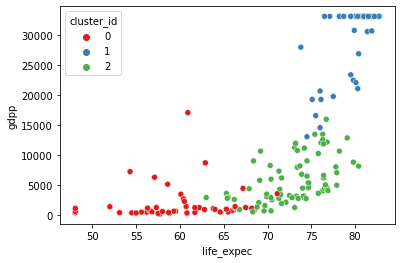

In [128]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

## KMeans cluster visualizations


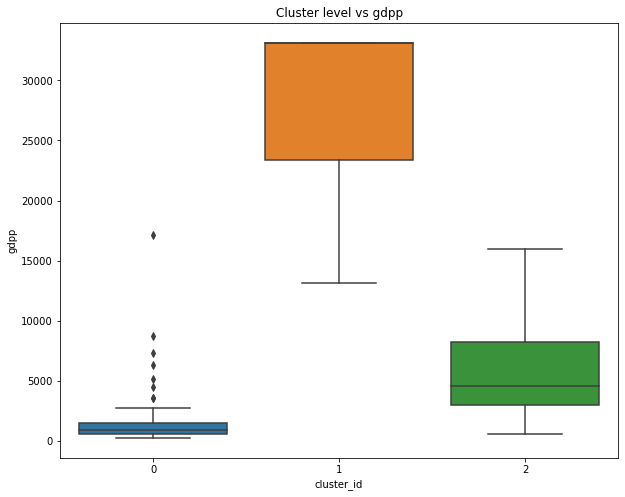

In [129]:
# Here we will be profiling for these 3 variables as mentioned in problem statement (gdpp, child_mort and income).
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='gdpp')
plt.title('Cluster level vs gdpp')
plt.show()

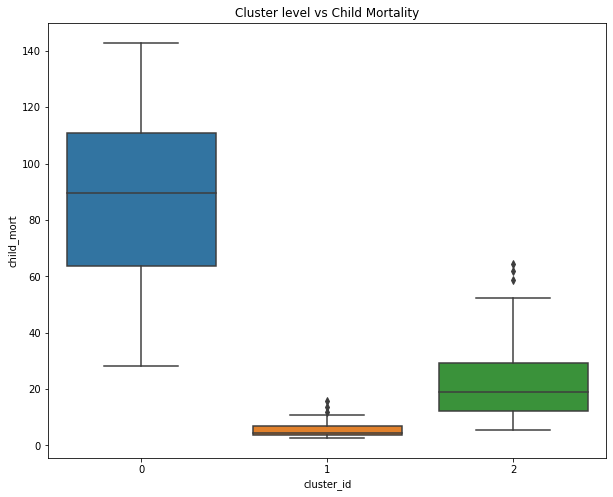

In [130]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='child_mort')
plt.title('Cluster level vs Child Mortality')
plt.show()

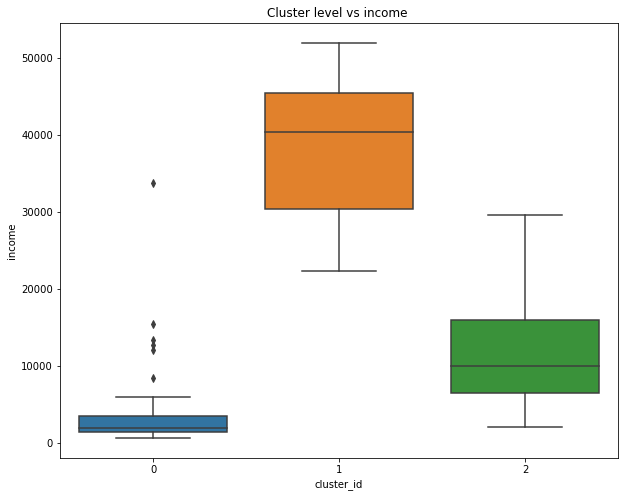

In [131]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='income')
plt.title('Cluster level vs income ')
plt.show()

#### Here cluster_id 0 has the lowest income and hightest child mortality rate with a very  very low gdpp so, this will be our concerned cluster.

In [132]:
#Finding the observations that belong to cluster_id 1
df[df['cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

## Top 10 counties using kMeans clustering.

In [133]:
# Here we will be profiling for these 3 variables as mentioned in problem statement (gdpp, child_mort and income).
top_kmeans = df[df['cluster_id']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0


In [134]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Top 10 countries obtained from K-Means Models are:


- Sierra Leone
- Central African Republic
- Haiti
- Chad
- Mali
- Nigeria
- Niger
- Angola
- Congo, Dem. Rep.
- Burkina Faso

### These are the top 10 countries we will be focusing on for providing the adequate help.

# Heirarichal Clustering

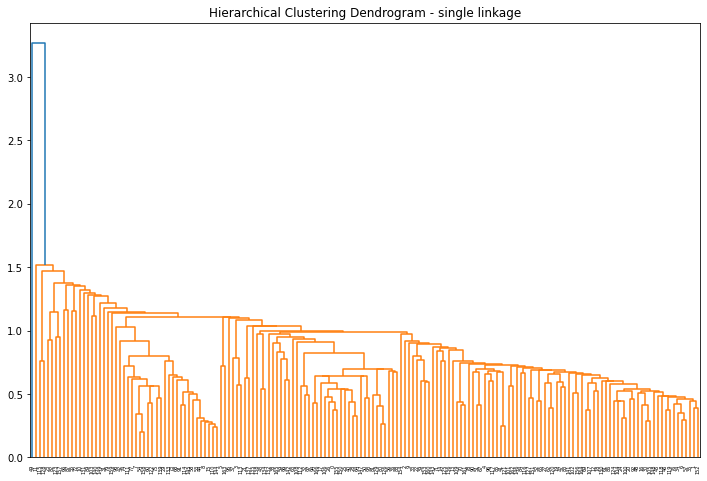

In [135]:
# Forming clusters with the help of Heirarichal Clustering using single linkage.
mergings_single = linkage(df1, method="single", metric='euclidean')
plt.figure(figsize=(12,8))
dendrogram(mergings_single)
plt.title('Hierarchical Clustering Dendrogram - single linkage')
plt.show()

##### cliusters are not forming using single linkage so we will be using complete linkage for further processing.

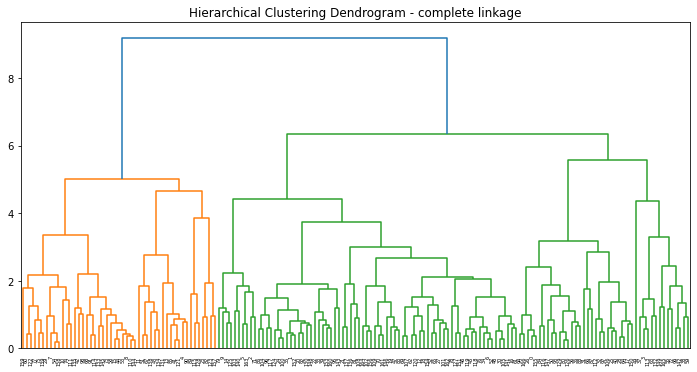

In [136]:
# Forming clusters with the help of Heirarichal Clustering using complete linkage.
mergings_complete = linkage(df1, method="complete", metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(mergings_complete)
plt.title('Hierarchical Clustering Dendrogram - complete linkage')
plt.show()

## Complete linkage is better than Single linkage. So we will go with complete linkage.


### Looking at this we can say that there are 3 clusters forming with heirarichal clustering.

In [137]:
# cutting dendrogram with '3' clusters
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [138]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


In [139]:
df['cluster_labels'].value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

## Visualizing the clusters.

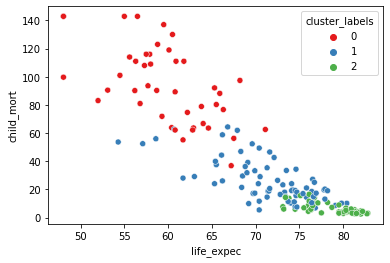

In [140]:
# Here we will be visualizing the clusters formed using hierarichal clustering.
# life_expec
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

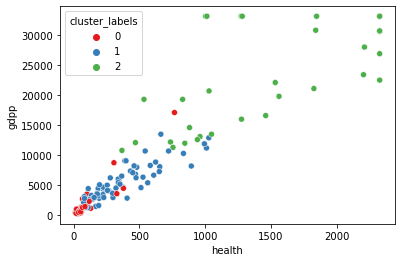

In [141]:
#health
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()


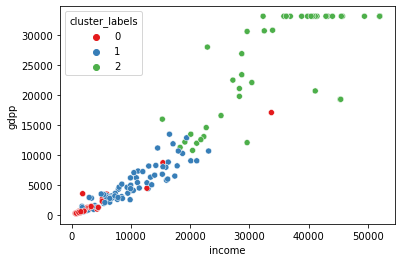

In [142]:
#income
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

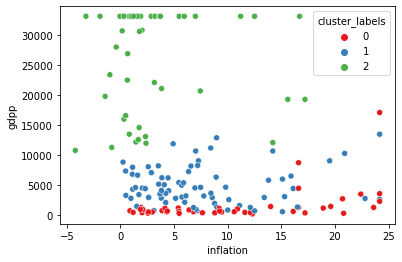

In [143]:
#inflation
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

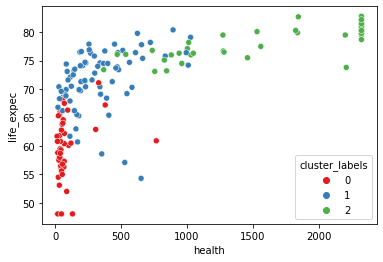

In [144]:
# health vs life_expec
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

## Heirarichal Clusters Visulaisation

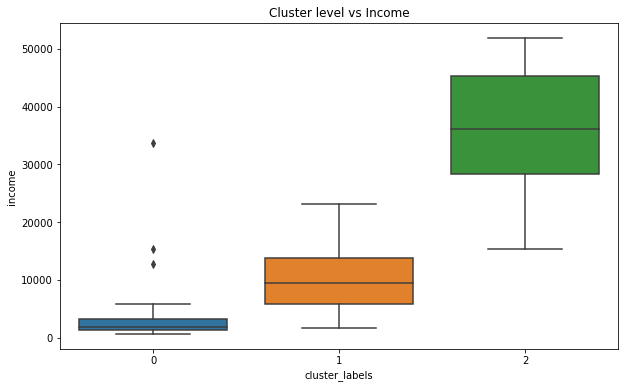

In [145]:
# profiling the clusters with the given variables mentioned in the problem statement
# income
plt.figure(figsize=(10,6))
plt.title('Cluster level vs Income')
sns.boxplot(data=df,x = 'cluster_labels',y='income')
plt.show()

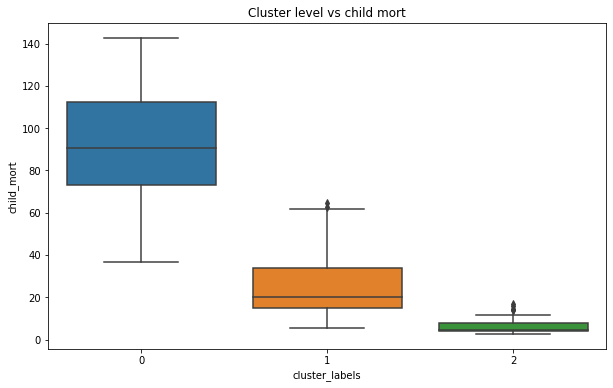

In [146]:
#child_mort
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = 'cluster_labels',y='child_mort')
plt.title('Cluster level vs child mort')
plt.show()

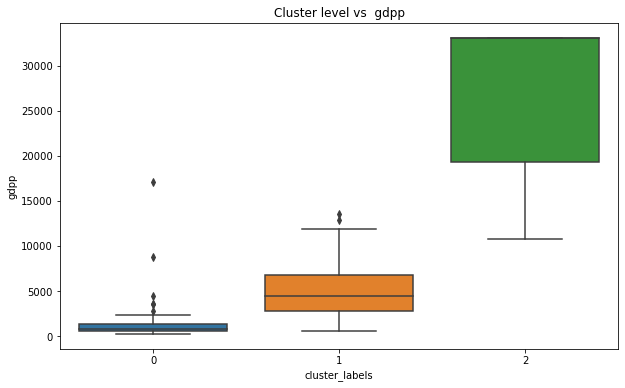

In [147]:
#gdpp
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = 'cluster_labels',y='gdpp')
plt.title('Cluster level vs  gdpp')
plt.show()

#### Here we can cluster_id 0 is having very lowe gdpp and income with a very high child_mort rate so this will be our focus of help.

### Finding the observations that belong to cluster 0

In [148]:
df[df['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [149]:
top_h = df[df['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0,0


In [150]:
#Obtaining top 10 countries which are in dire need of help.
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Top 10 Countries obtained from Hierarchical Models are:


- Sierra Leone
- Central African Republic
- Haiti
- Chad
- Mali
- Nigeria
- Niger
- Angola
- Congo, Dem. Rep.
- Burkina Faso

# Result

My result is same in both methods which is same top 10 countries and i sorted countries by considering the lowest gdpp.

We have seen from both methods - (K-Means and Hierarchical clustering) that top 10 countries are are similar. I would choose the final countries from hierarchical clustering because the comlete linkage give us accurate output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave precise information than K-Means clustering.

# Conclusion

So, in our both Kmeans and hierarchical clustering got same countires with the lowest gdpp and income, these countries are in direst need of aid from our analysis.